TDSS Quasar Research

initially playing around with fixed width text file data

In [3]:
import astropy.io.fits as fits
import astropy.io.ascii as ascii
import matplotlib.pyplot as plt
import os
import numpy as np
import astroML.datasets as amlds
import pdb

#PLATE,MJD,FIBER,CLASS,SUBCLASS,Z,Z_ERR,ZWARNING,PLUG_RA,PLUG_DEC,PRIMARY,CHUNK,PLATESN2,DEREDSN2,OBJTYPE,BOSS1,ANCILLARY1,EBOSS0,EBOSS1,EBOSS2,EBOSSID,THIDTARG,TILEID,OBJC_TYPE,MODELFLUX0,MODELFLUX1,MODELFLUX2,MODELFLUX3,MODELFLUX4,TDSSTARG,CORE,PTF
tbdata = ascii.read('/users/drew/data/spalltdss.txt', format='fixed_width_two_line')

len(tbdata)

57691


The max redshift value is 7.0112
The min redshift value is -0.0073828


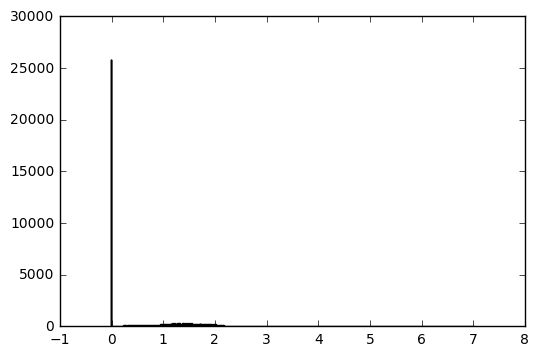

In [4]:
# redshift value to use: Z
idx = 'Z'

z_max = np.max(tbdata[idx])
z_min = np.min(tbdata[idx])
print('\nThe max redshift value is ' + str(z_max))
print('The min redshift value is ' + str(z_min))

z_hist = plt.hist(tbdata[idx], bins = 500)
plt.show()

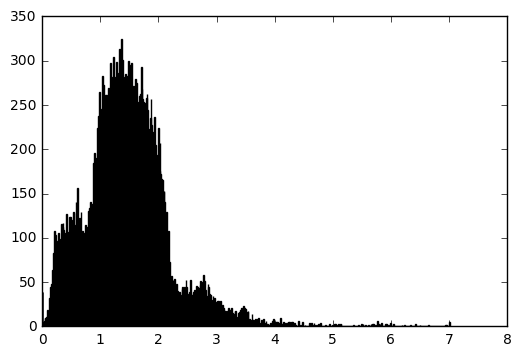

In [13]:
#let's just check out redshifts greater than 0.001 (>0.0001 showed the big spike)
t = tbdata[(tbdata[idx] > 0.001)]
z_hist = plt.hist(t[idx], bins = 500)
plt.show()

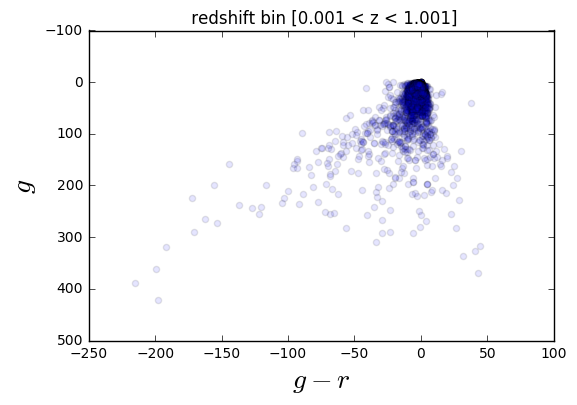

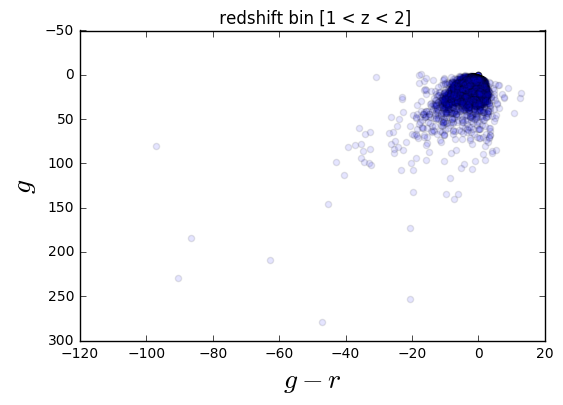

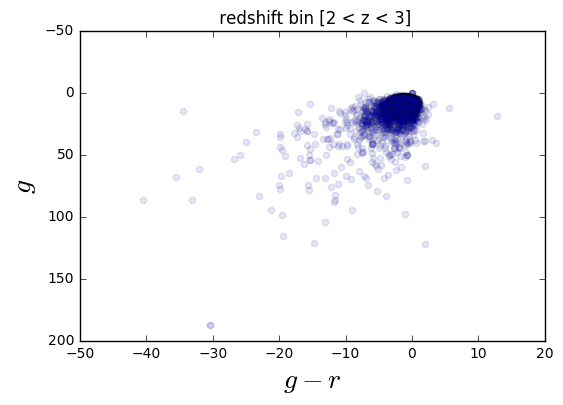

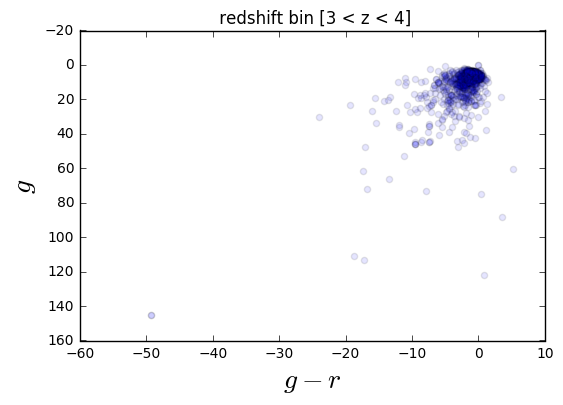

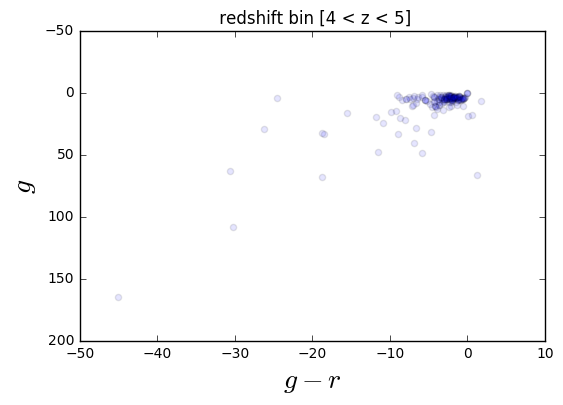

In [17]:
# show some color-magnitude diagrams
for i in range(0,5):

    # separate quasars into redshift bins
    i = i if i > 0 else 0.001
    #print(i)
    d = tbdata[(tbdata[idx] >= (i)) & (tbdata[idx] < (i + 1))]

    # are these color magnitude values?
    g = d['MODELFLUX2']
    r = d['MODELFLUX3']

    # setup scatter plot
    plt.scatter(g - r, g, alpha = 0.1)
    plt.title(' redshift bin [' + str(i) + ' < z < ' + str(i+1) + ']')
    plt.ylim(reversed(plt.ylim()))
    plt.xlabel("$g-r$", fontsize=20)
    plt.ylabel("$g$", fontsize=20)
    plt.show()